In [1]:
import numpy as np
import matplotlib.pyplot as plt

def model_linear(x,w):#Model
    f=w[1]*x+w[0] #Linear Predictor
    return f

def loss_MSE(f,y):
    loss=np.sum(np.square(y-f))/np.size(f)
    return loss

def loss_MAE(f,y):
    loss=np.sum(np.abs(y-f))/np.size(f)
    return loss

Text(0, 0.5, 'f(x) and y')

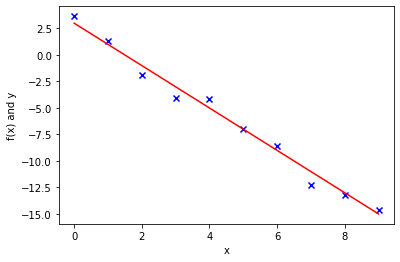

In [8]:
#Cook up Data
x=np.array([0,1,2,3,4,5,6,7,8,9]) #Inputs
w_ideal=np.array([3,-2]) #Actual Weights
y=w_ideal[1]*x+w_ideal[0]+0.9*np.random.randn(np.size(x)) #Adding some noise to desired output

#TRY THE IDEAL WEIGHTS AND PLOT DATA
w=w_ideal #Some estimated weights
f=model_linear(x,w)#Model

#Plot data
plt.scatter(x,y,c='b',marker='x')
plt.plot(x,f,c='r')
plt.xlabel('x')
plt.ylabel('f(x) and y')

In [9]:
# Check the loss with ideal weights. It should be low, if the noise is low
loss=loss_MSE(f,y)
print(loss)

0.5351444493468422


In [10]:
# Now deviate from the ideal weights. Loss should increase
w=np.array([3.5,-1.9]) #Some estimated weights
f=model_linear(x,w) #Model
loss=loss_MSE(f,y)

print(loss)

1.7227112307070556


In [12]:
#Try very different weights, loss should be large
w=np.array([32,2.1])
f=model_linear(x,w)
loss=loss_MSE(f,y)
print(loss)

2400.478479503041


In [13]:
#Add an outlier and check MSE Loss with Ideal weights
x=np.append(x,[10])
y=np.append(y,[108])

w=w_ideal 
f=model_linear(x,w)

loss=loss_MSE(f,y)

print(loss)

1420.9410404084972


In [14]:
loss=loss_MAE(f,y)

print(loss)

11.927865803742879


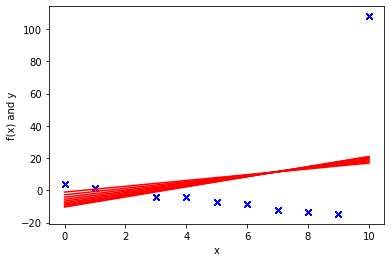

In [15]:
#Define Gradient

def grad2(w,x,y):
    x1=np.vstack((x,np.ones_like(x)))
    f=w.dot(x1).flatten()
    error=(y.flatten()-f)
    gradient=-(1.0/len(x))*x1.dot(error)
    return gradient,f
#Gradient Descent 

w=np.array([10,2.1])
learning_rate=0.0005
min_abs_change=1e-5
max_iter=10000

iterations=1
while True:
    gradient,f=grad2(w,x,y)
    w_new=w-learning_rate*gradient
    
    #Stopping Condition
    if np.sum(abs(w_new-w))<min_abs_change:
        break
    if iterations>max_iter:
        break
    
    if iterations%(max_iter/10)==0:
        #Plot Data
        plt.scatter(x,y,c='b',marker='x')
        plt.plot(x,f,c='r')
        plt.xlabel('x')
        plt.ylabel('f(x) and y')
        
    iterations +=1
    w=w_new

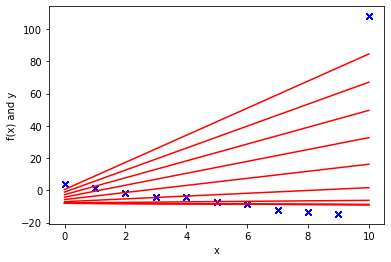

In [16]:
#Perform gradient descent on MAE Loss

def grad1(w,x,y):
    x1=np.vstack((x,np.ones_like(x)))
    f=w.dot(x1).flatten()
    error=(y.flatten()-f)
    gradient=-(1.0/len(x))*x.dot(np.sign(error))
    return gradient,f

#Gradient Descent 

w=np.array([10,2.1]) #Some estimated weights
learning_rate=0.0005
min_abs_change=1e-5
max_iter=10000

iterations=1
while True:
    gradient,f=grad1(w,x,y)
    w_new=w-learning_rate*gradient
    
    #Stopping Condition
    if np.sum(abs(w_new-w))<min_abs_change:
        break
    if iterations>max_iter:
        break
        
    if iterations % (max_iter/10)==0:
        #plot data
        plt.scatter(x,y,c='b',marker='x')
        plt.plot(x,f,c='r')
        plt.xlabel('x')
        plt.ylabel('f(x) and y')
        
    iterations +=1
    w=w_new